## Reservas de Hotel




Descripción de los datos

El fichero contiene los diferentes atributos de los datos de reserva de los clientes. A continuación se detalla el diccionario de datos:

id: identificador único de cada reserva

no_of_adults: Número de adultos

no_of_children: Número de niños

no_of_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel

no_of_week_nights: Número de noches entre semana (de lunes a viernes) que el huésped se alojó o reservó en el hotel

type_of_meal_plan: Tipo de plan de comidas reservado por el cliente:

plaza_de_aparcamiento_necesaria: ¿Necesita el cliente una plaza de aparcamiento? (0 - No, 1- Sí)

room_type_reserved: Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.

lead_time: Número de días entre la fecha de reserva y la fecha de llegada

año_llegada: Año de la fecha de llegada

arrival_month: Mes de la fecha de llegada

arrival_date: Fecha del mes

market_segment_type: Denominación del segmento de mercado.

repeated_guest: ¿Es el cliente un huésped repetido? (0 - No, 1- Sí)

no_of_previous_cancellations: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

no_of_previous_bookings_not_canceled: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

avg_price_per_room: Precio medio por día de la reserva; los precios de las habitaciones son dinámicos. (en euros)

no_of_special_requests: Número total de peticiones especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)

In [8]:
df = pd.read_csv('data/HotelReservations2.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
df.shape

(36275, 19)

In [11]:
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [13]:
print(f"Duplicates in Dataset is:{df.duplicated().sum()},({100*df.duplicated().sum()/len(df)})%")

Duplicates in Dataset is:0,(0.0)%


In [14]:
#valores que faltan en el conjunto de datos
Total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
Booking_ID,0,0.0
arrival_month,0,0.0
no_of_special_requests,0,0.0
avg_price_per_room,0,0.0
no_of_previous_bookings_not_canceled,0,0.0
no_of_previous_cancellations,0,0.0
repeated_guest,0,0.0
market_segment_type,0,0.0
arrival_date,0,0.0
arrival_year,0,0.0


In [15]:
print("Cardinality of features in numerical data is: ")
print(df.select_dtypes(exclude=["object"]).nunique())
print("\nCardinality of features in categorical data is: ")
print(df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
required_car_parking_space                 2
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
dtype: int64

Cardinality of features in categorical data is: 
Booking_ID             36275
type_of_meal_plan          4
room_type_reserved         7
market_segment_type        5
booking_status             2
dtype: int64


In [16]:
df.drop(columns=['Booking_ID'], inplace=True)

In [20]:
pip install -U scikit-learn scipy matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.decomposition import PCA

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [20]:
from sklearn.decomposition import PCA

In [21]:
df['booking_status'] = df['booking_status'].replace({"Not_Canceled":0, "Canceled":1})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [23]:
num_df=df[["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","required_car_parking_space","lead_time","arrival_year","arrival_month","arrival_date","repeated_guest","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests","booking_status"]]
num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int)
cat_df=df[['type_of_meal_plan','room_type_reserved','market_segment_type']]
cat_df.head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online


In [24]:
num_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,224,2017,10,2,0,0,0,65,0,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106,1,0
2,1,0,2,1,0,1,2018,2,28,0,0,0,60,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94,0,1


In [25]:
num_df.describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.0,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.0,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.0,0.0,1.0


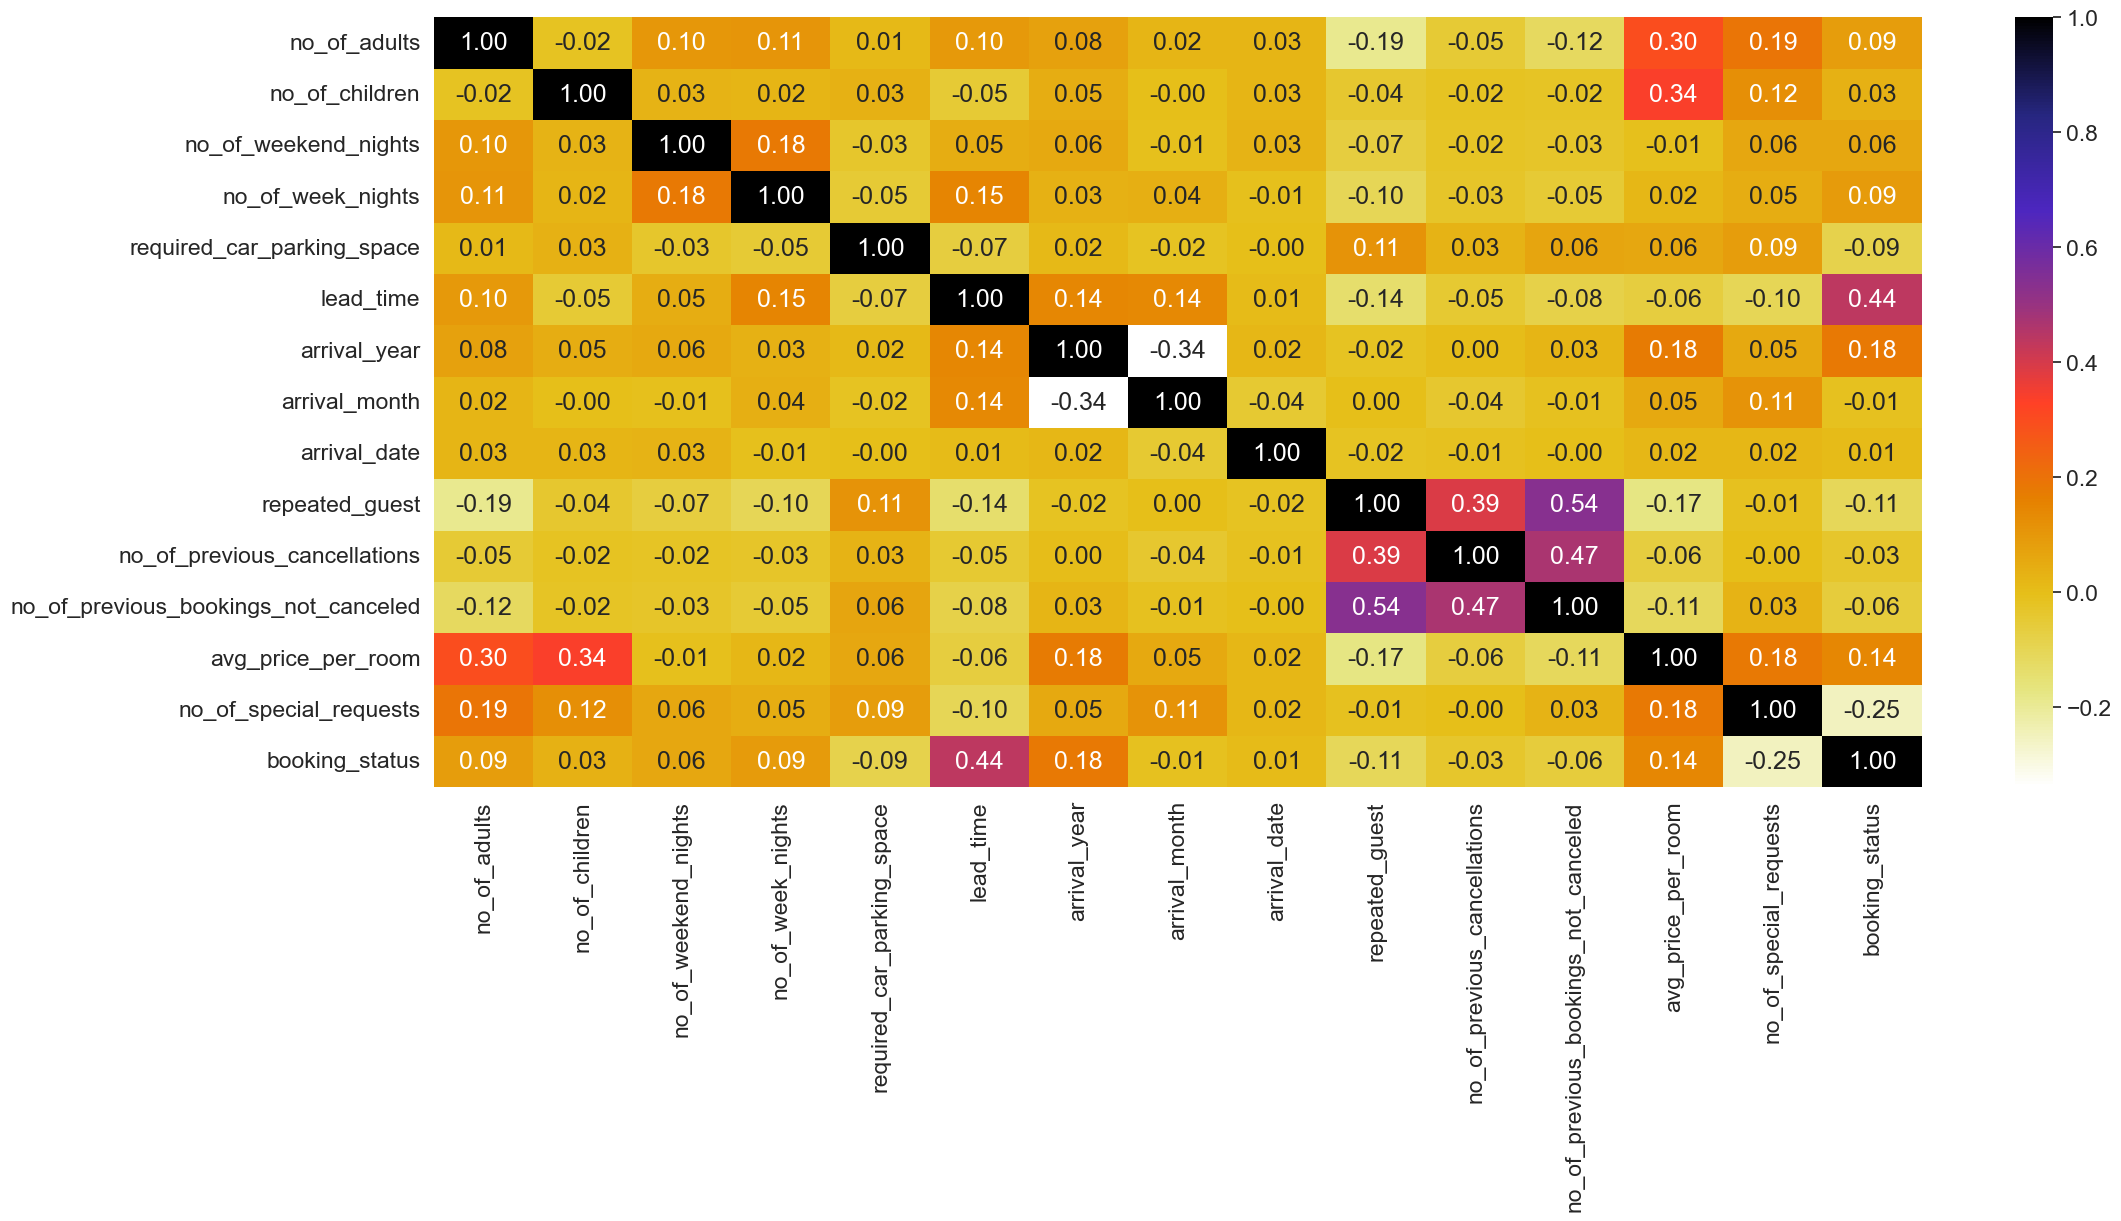

In [26]:
correlation=num_df.corr()
fig, ax = plt.subplots(figsize=(24, 10))

sns.heatmap(correlation, annot=True, fmt='.2f', cmap=plt.cm.CMRmap_r)
plt.show()

eliminare la función arrival_date  porque la correlación con booking_status  es demasiado baja.

In [27]:
num_df.drop(columns=["arrival_date",],inplace=True)

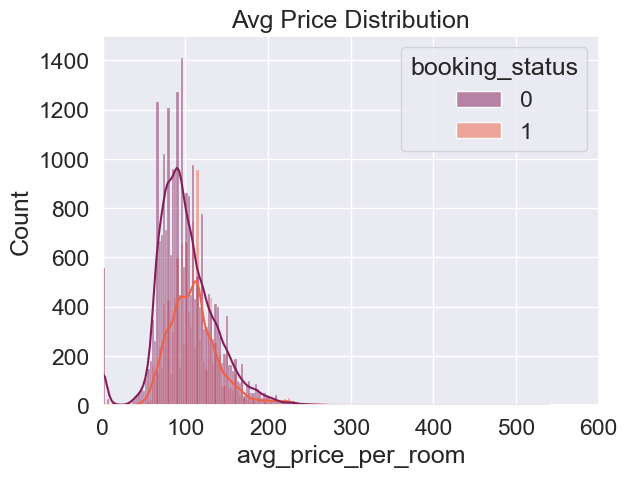

In [28]:
sns.histplot(x="avg_price_per_room", hue="booking_status", data=df, kde=True, palette="rocket",bins=200)
plt.ylim(0,1500)
plt.xlim(0,600)
plt.title("Avg Price Distribution");

In [29]:
pd.pivot_table(df, index = 'booking_status', values = ['avg_price_per_room'])

,avg_price_per_room
booking_status,
0,99.931412
1,110.589966


El precio medio de la cancelación y la no cancelación es bastante similar.

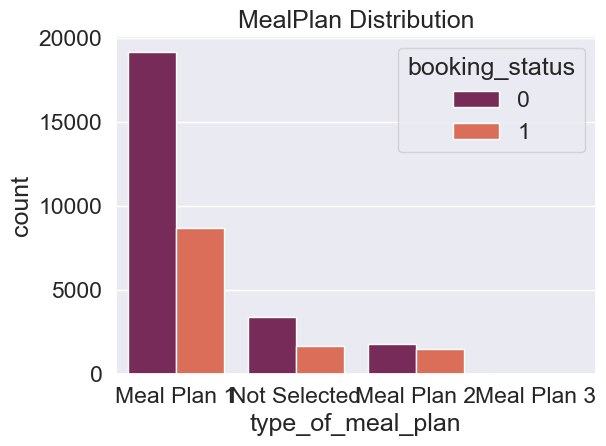

In [30]:
sns.countplot(x='type_of_meal_plan', hue="booking_status", data=df, palette="rocket")
plt.title(f"MealPlan Distribution")
plt.tight_layout()

Los que no cancelaron sus reservas son más propensos a pedir el plan de comidas 1.

In [31]:
from sklearn.decomposition import PCA


In [32]:
pca = PCA(n_components=1)
num_df["no_of_guests"] = pca.fit_transform(num_df[["no_of_adults","no_of_children"]])
num_df.drop(columns=["no_of_adults","no_of_children"],inplace=True)

se podría hacer lo mismo con no_of_weekend_nights y no_of_week_nights (ya que están relacionados con el número de días de estancia)

In [33]:
num_df["no_of_week_days"] = pca.fit_transform(num_df[["no_of_weekend_nights","no_of_week_nights"]])
num_df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

In [34]:
num_df.head()

,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_guests,no_of_week_days
0,0,224,2017,10,0,0,0,65,0,0,0.158982,-0.168923
1,0,5,2018,11,0,0,0,106,1,0,0.158982,0.987358
2,0,1,2018,2,0,0,0,60,0,1,-0.840274,-0.983180
3,0,211,2018,5,0,0,0,100,0,1,0.158982,-0.339934
4,0,48,2018,4,0,0,0,94,0,1,0.158982,-1.154192


In [35]:
num_df["cancellations_rate"] = num_df["no_of_previous_cancellations"] / (num_df["no_of_previous_cancellations"] + num_df["no_of_previous_bookings_not_canceled"]) *100
num_df['cancellations_rate'].fillna(0,inplace=True)

In [36]:
num_df.drop(columns=["no_of_previous_cancellations","no_of_previous_bookings_not_canceled"],inplace=True)

In [37]:
num_df.head()

,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_guests,no_of_week_days,cancellations_rate
0,0,224,2017,10,0,65,0,0,0.158982,-0.168923,0.0
1,0,5,2018,11,0,106,1,0,0.158982,0.987358,0.0
2,0,1,2018,2,0,60,0,1,-0.840274,-0.983180,0.0
3,0,211,2018,5,0,100,0,1,0.158982,-0.339934,0.0
4,0,48,2018,4,0,94,0,1,0.158982,-1.154192,0.0


<Axes: >

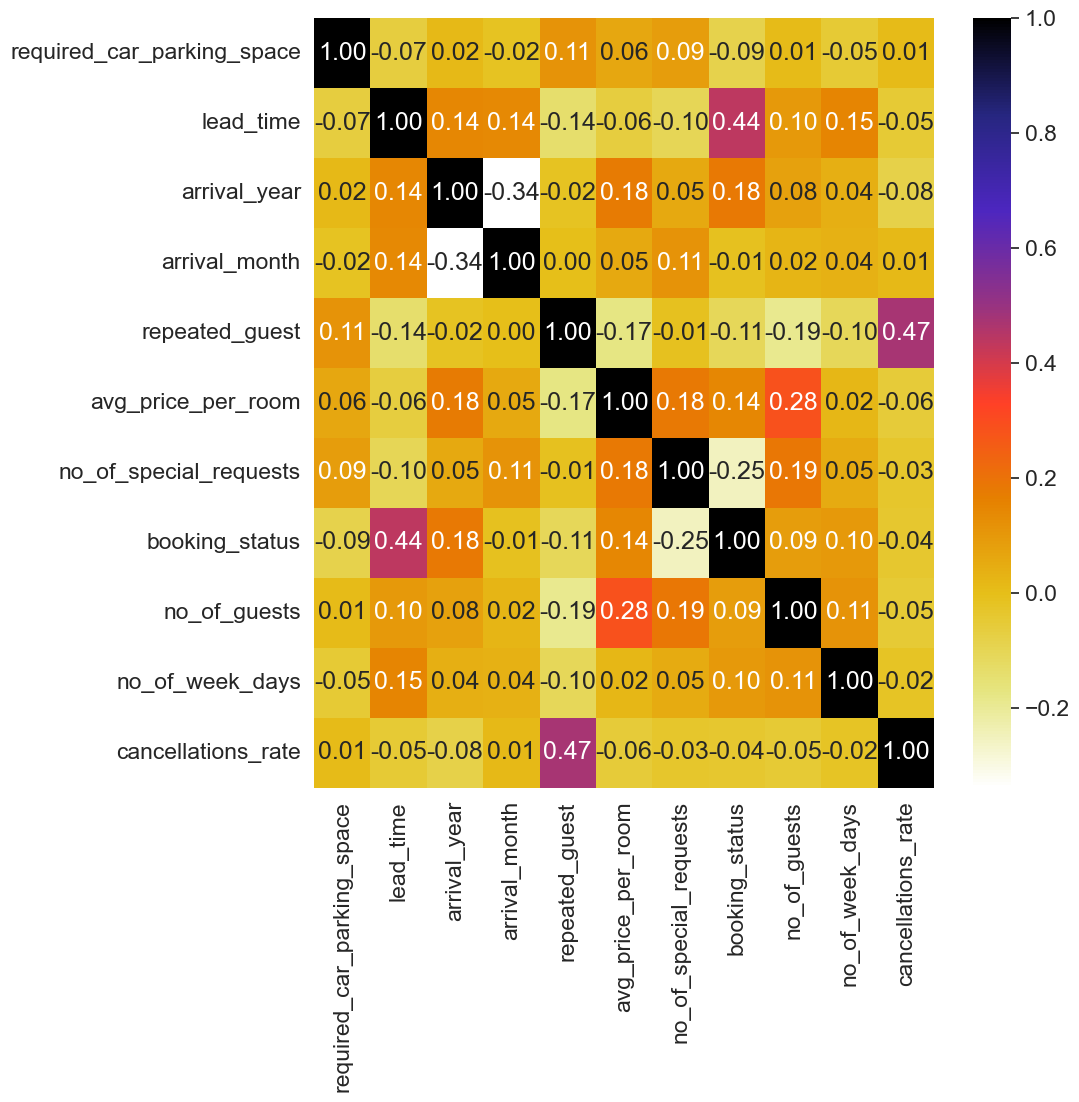

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(),annot=True, fmt=".2f",cmap=plt.cm.CMRmap_r)

también eliminaremos la función cancellations_rate ya que la correlación es demasiado pequeña

In [39]:
num_df.drop(columns=["cancellations_rate"],inplace=True)

In [40]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
required_car_parking_space,36275.0,3.098553e-02,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,36275.0,8.523256e+01,85.930817,0.000000,17.000000,57.000000,126.000000,443.000000
arrival_year,36275.0,2.017820e+03,0.383836,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,36275.0,7.423653e+00,3.069894,1.000000,5.000000,8.000000,10.000000,12.000000
repeated_guest,36275.0,2.563749e-02,0.158053,0.000000,0.000000,0.000000,0.000000,1.000000
avg_price_per_room,36275.0,1.031573e+02,35.066193,0.000000,80.000000,99.000000,120.000000,540.000000
no_of_special_requests,36275.0,6.196554e-01,0.786236,0.000000,0.000000,0.000000,1.000000,5.000000
booking_status,36275.0,3.276361e-01,0.469358,0.000000,0.000000,0.000000,1.000000,1.000000
no_of_guests,36275.0,1.057734e-17,0.518869,-1.955208,0.120423,0.158982,0.158982,2.157495
no_of_week_days,36275.0,-1.764849e-16,1.424409,-2.310472,-1.154192,-0.168923,0.645335,15.636182


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_df[["lead_time","avg_price_per_room","no_of_guests","no_of_week_days","no_of_special_requests"]] = scaler.fit_transform(num_df[["lead_time","avg_price_per_room","no_of_guests","no_of_week_days","no_of_special_requests"]])

In [42]:
num_df.head()

,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_guests,no_of_week_days
0,0,1.614896,2017,10,0,-1.088166,-0.78814,0,0.306406,-0.118593
1,0,-0.933701,2018,11,0,0.081068,0.48376,0,0.306406,0.693180
2,0,-0.980250,2018,2,0,-1.230755,-0.78814,1,-1.619458,-0.690247
3,0,1.463610,2018,5,0,-0.090039,-0.78814,1,0.306406,-0.238652
4,0,-0.433291,2018,4,0,-0.261147,-0.78814,1,0.306406,-0.810306


In [43]:
cat_df = pd.get_dummies(cat_df,columns=["type_of_meal_plan","room_type_reserved","market_segment_type"])

In [44]:
cat_df.head()

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [45]:
df_final=pd.merge(num_df, cat_df, left_index=True, right_index=True, how='outer')
df_final.head()

,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status,no_of_guests,no_of_week_days,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0,1.614896,2017,10,0,-1.088166,-0.78814,0,0.306406,-0.118593,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,-0.933701,2018,11,0,0.081068,0.48376,0,0.306406,0.693180,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,-0.980250,2018,2,0,-1.230755,-0.78814,1,-1.619458,-0.690247,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.463610,2018,5,0,-0.090039,-0.78814,1,0.306406,-0.238652,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,-0.433291,2018,4,0,-0.261147,-0.78814,1,0.306406,-0.810306,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


<Axes: >

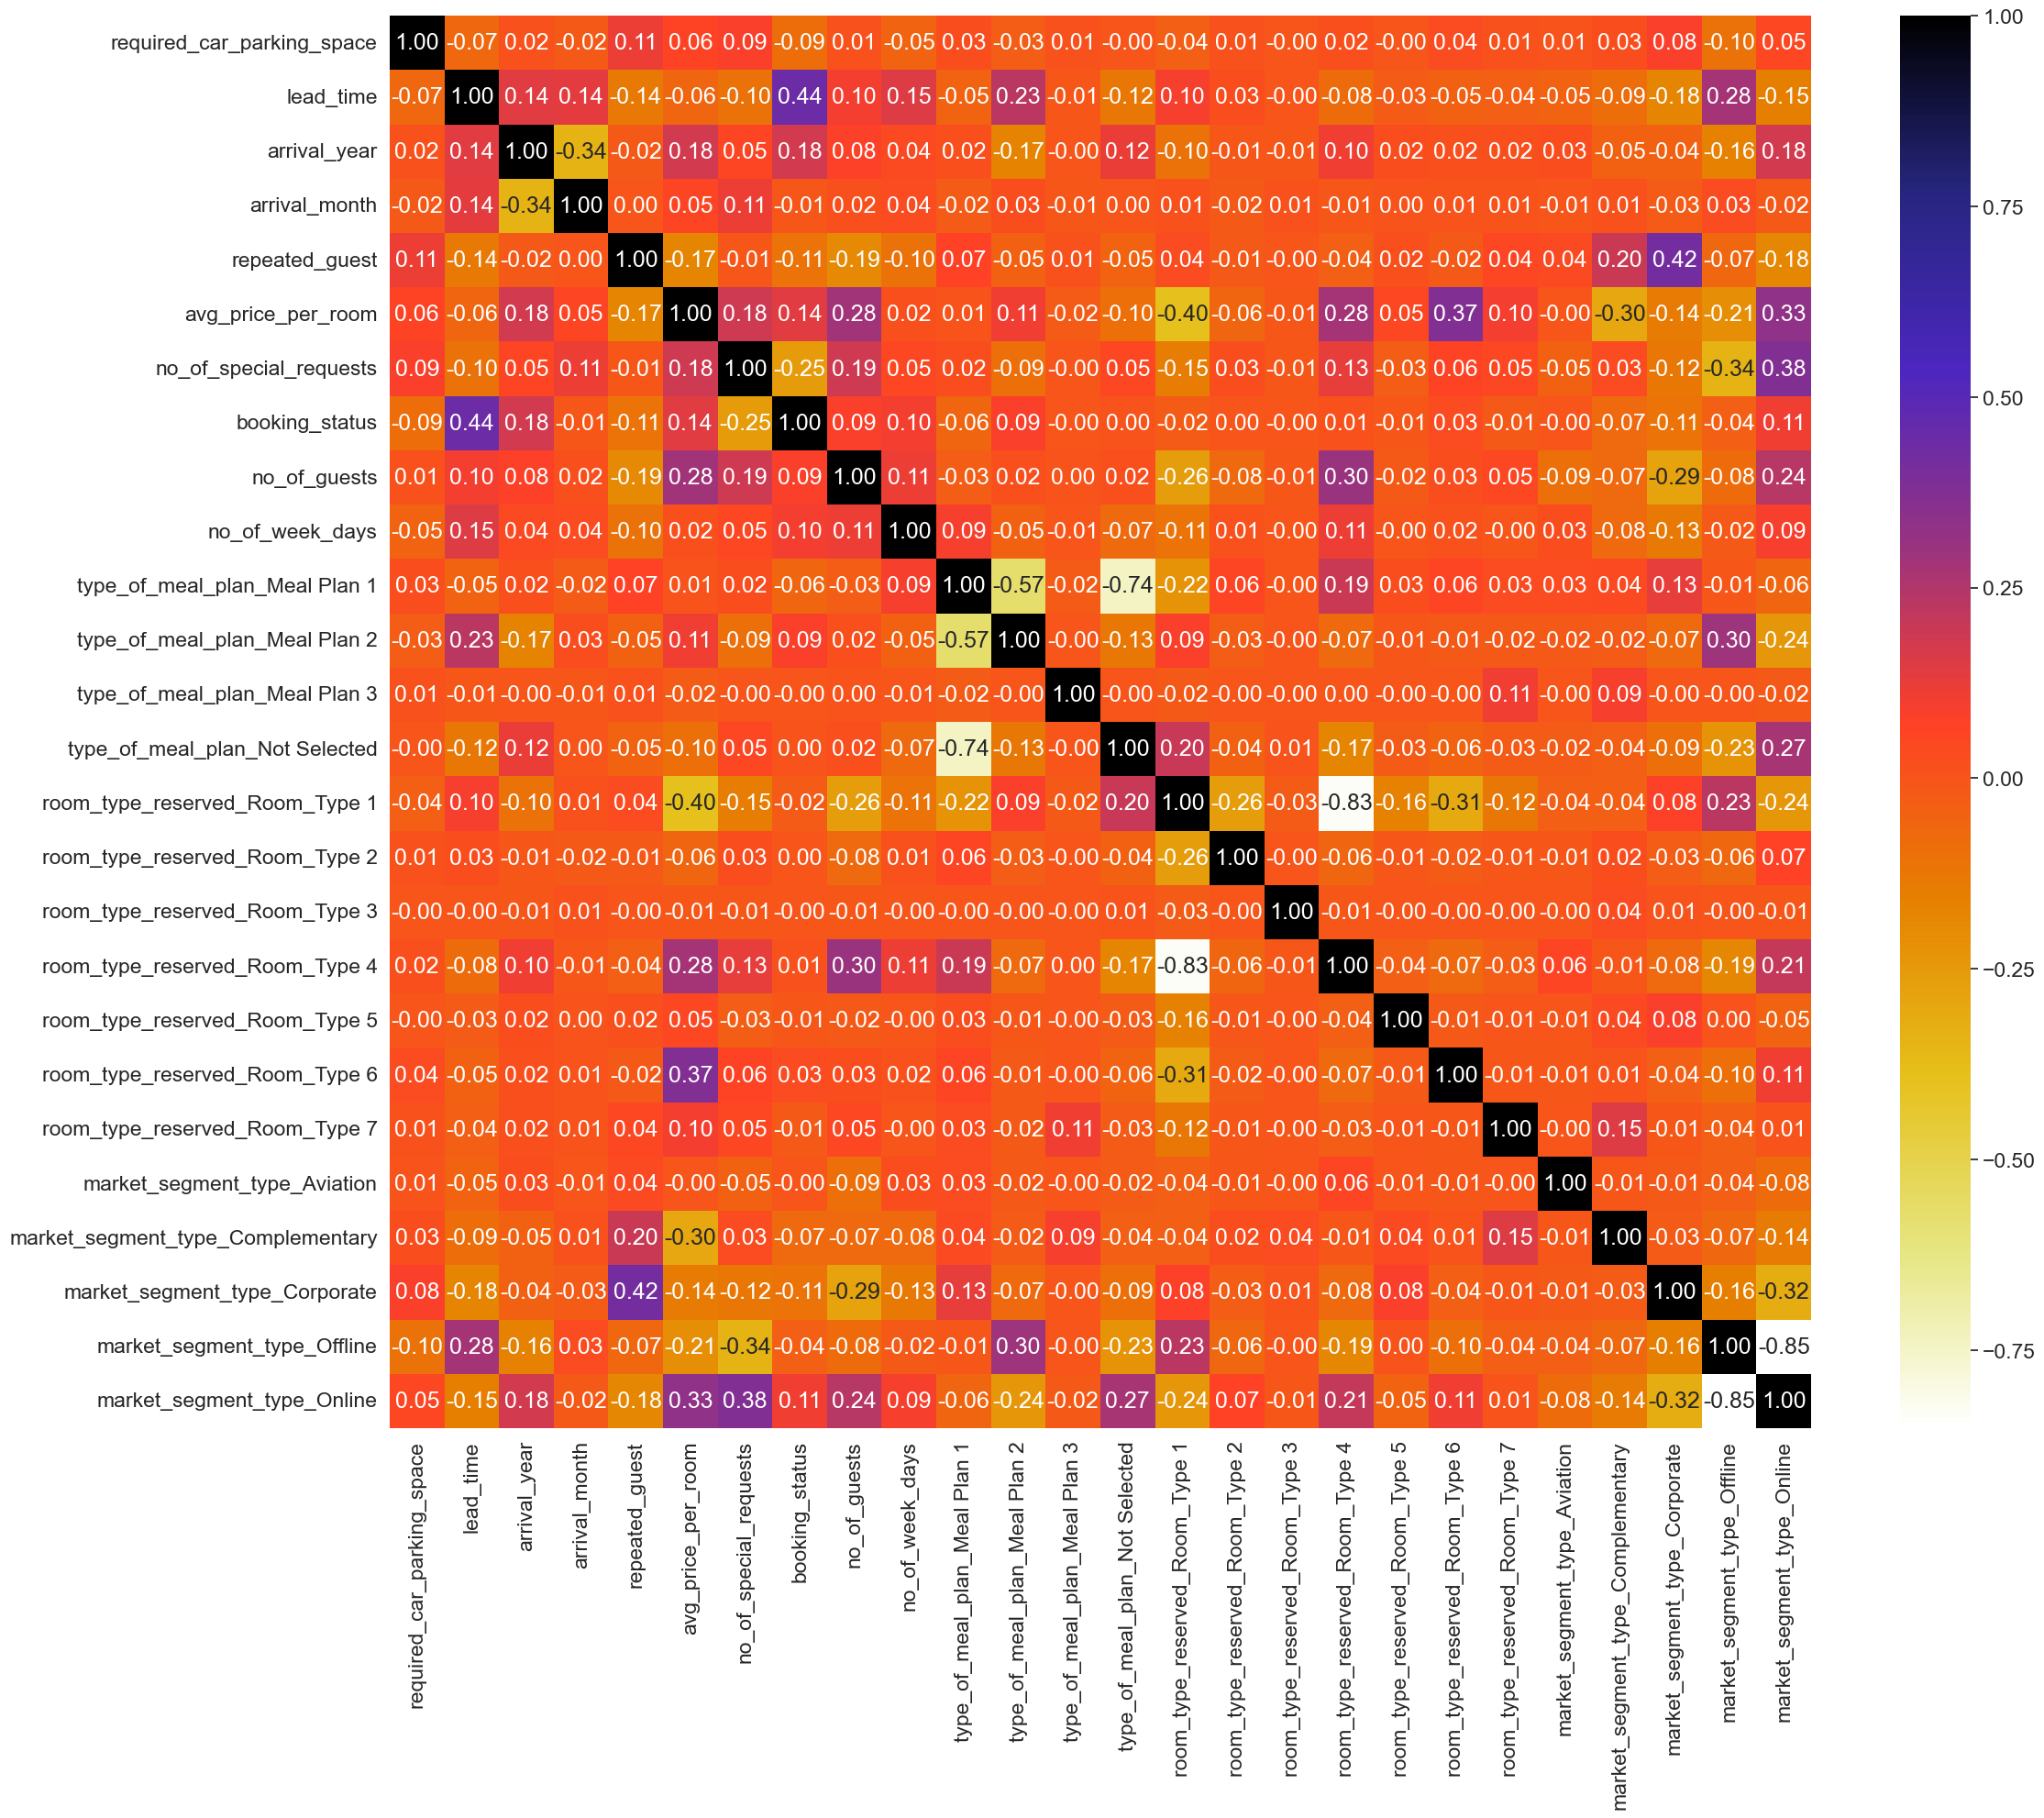

In [46]:
plt.figure(figsize=(25,20))
sns.heatmap(df_final.corr(),annot=True, fmt=".2f",cmap=plt.cm.CMRmap_r)

descartar las características con menor correlación con la característica objetivo

In [47]:
df_final.drop(columns=['type_of_meal_plan_Meal Plan 3','type_of_meal_plan_Not Selected','room_type_reserved_Room_Type 1','room_type_reserved_Room_Type 2',
                 'room_type_reserved_Room_Type 3','room_type_reserved_Room_Type 4','room_type_reserved_Room_Type 5',
                 'room_type_reserved_Room_Type 6','room_type_reserved_Room_Type 7','market_segment_type_Aviation',"market_segment_type_Offline"],inplace=True)

# Train-Test Split

In [48]:
X = df_final.drop(['booking_status'],axis=1)
Y = df_final['booking_status']
print(Y)

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

# Modelling

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [52]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

# Modelling with Logistic Regression

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred_lr = logreg.predict(X_test)

In [55]:
acc_lr = accuracy_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)
prec_lr = precision_score(y_test,y_pred_lr)
rec_lr = recall_score(y_test,y_pred_lr)
results_lr = pd.DataFrame([['Logistic Regression', acc_lr, f1_lr, prec_lr, rec_lr]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_lr

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.803455,0.666042,0.737042,0.607519


In [56]:
cm_lr=confusion_matrix (Y , logreg.predict(X))
cm_lr

array([[21813,  2577],
       [ 4568,  7317]], dtype=int64)

In [57]:
def cm_visulize(cm):
    group_names = ['True Neg','False ','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

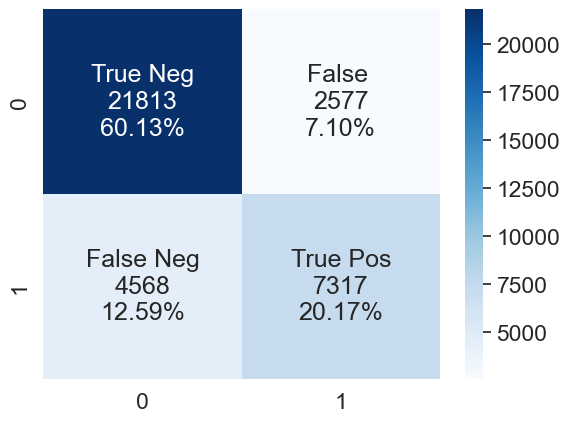

In [58]:
cm_visulize(cm_lr)

# Modelling with K-Nearest Neighbour


In [59]:
knn = KNeighborsClassifier().fit(X_train,y_train)
y_knn=knn.predict(X_test)

In [60]:
acc_knn = accuracy_score(y_test,y_knn)
f1_knn = f1_score(y_test,y_knn)
prec_knn = precision_score(y_test,y_knn)
rec_knn = recall_score(y_test,y_knn)
results_knn = pd.DataFrame([['KNN', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.860057,0.778473,0.795482,0.762176


In [61]:
cm_knn=confusion_matrix (Y , knn.predict(X))
cm_knn

array([[22614,  1776],
       [ 2323,  9562]], dtype=int64)

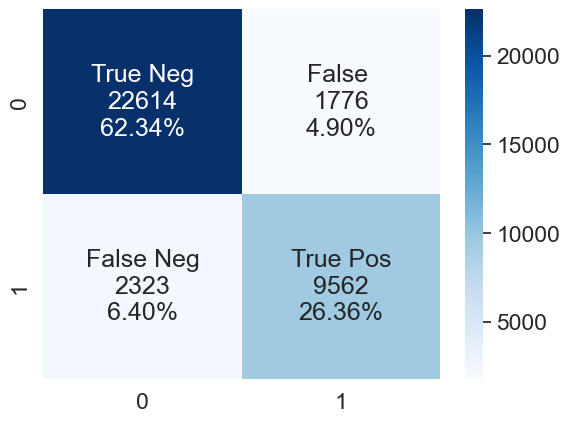

In [62]:
cm_visulize(cm_knn)

# Modelling with Multi-Layer Perceptron


In [63]:
mlp=MLPClassifier().fit(X_train,y_train)
y_mlp=mlp.predict(X_test)

In [64]:
acc_mlp = accuracy_score(y_test,y_mlp)
f1_mlp = f1_score(y_test,y_mlp)
prec_mlp = precision_score(y_test,y_mlp)
rec_mlp = recall_score(y_test,y_mlp)
results_mlp = pd.DataFrame([['MLP Classifier', acc_mlp, f1_mlp, prec_mlp, rec_mlp]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_mlp

,Model,Accuracy Score,F1 score,Precision,Recall
0,MLP Classifier,0.745199,0.36501,0.931075,0.227001


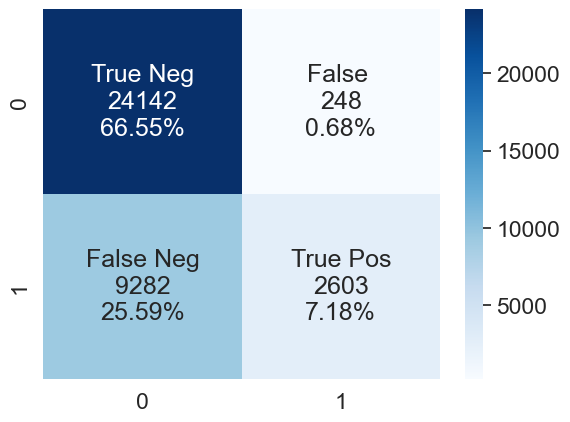

In [65]:
cm_visulize(confusion_matrix (Y , mlp.predict(X)))

# Modelling with Random Forest

In [66]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_rf=rf.predict(X_test)


In [67]:
acc_rf = accuracy_score(y_test,y_rf)
f1_rf = f1_score(y_test,y_rf)
prec_rf = precision_score(y_test,y_rf)
rec_rf = recall_score(y_test,y_rf)
results_rf = pd.DataFrame([['Random Forrest', acc_rf, f1_rf, prec_rf, rec_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random Forrest,0.896903,0.834562,0.865179,0.806038


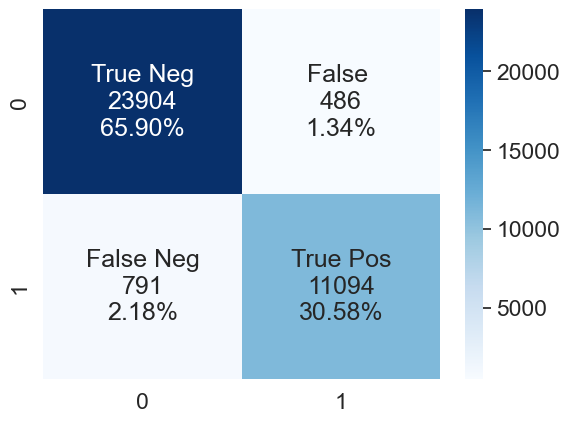

In [68]:
cm_visulize(confusion_matrix (Y , rf.predict(X)))